# Chapter 6
***   
# Storing Data  
***  



# Media Files  
***  
You can store media files in two main ways:   
 - Reference : by storing the URL where the file is located.   
  - This has several advantages:<font color=green>(don’t have to download files)</font>
    1. Scrapers run much faster and require much less bandwidth.  
    2. You save space on your own machine by storing only the URLs.  
    3. It is easier to write code that stores only URLs.  
    4. You can lessen the load on the host server.   
  - disadvantages:
    1. Embedding these URLs in your own website : hotlinking  <font color=green>???</font>
    2. You do not want to use someone else’s server cycles to host media for your own applications.<font color=green>???</font>
    3. The file hosted at any particular URL is subject to change.   
    (might eventually go missing or be changed to something completely irrelevant at a later date.)  
    4. Real web browsers do not just request a page’s HTML and move on.  
    Downloading files can help make your scraper look like a human is browsing the site.

    
 - Downloading the file itself.  
     
     
 - you should ask yourself whether you’re  <font color=green>likely to view or read that file more than once or twice</font>,   
 or if this database of files is going to be sitting around gathering electronic dust for most of its life.  If the answer is the latter, it’s probably best to simply store the URL.   
   
     
 <font color=green>If it’s the former, read on!</font>


# urllib library  
 - used to retrieve the content of webpages also contains functions to retrieve the content of files.  
 - <font color=green>urllib.request.urlre</font> trieve to download images from a remote URL:  
 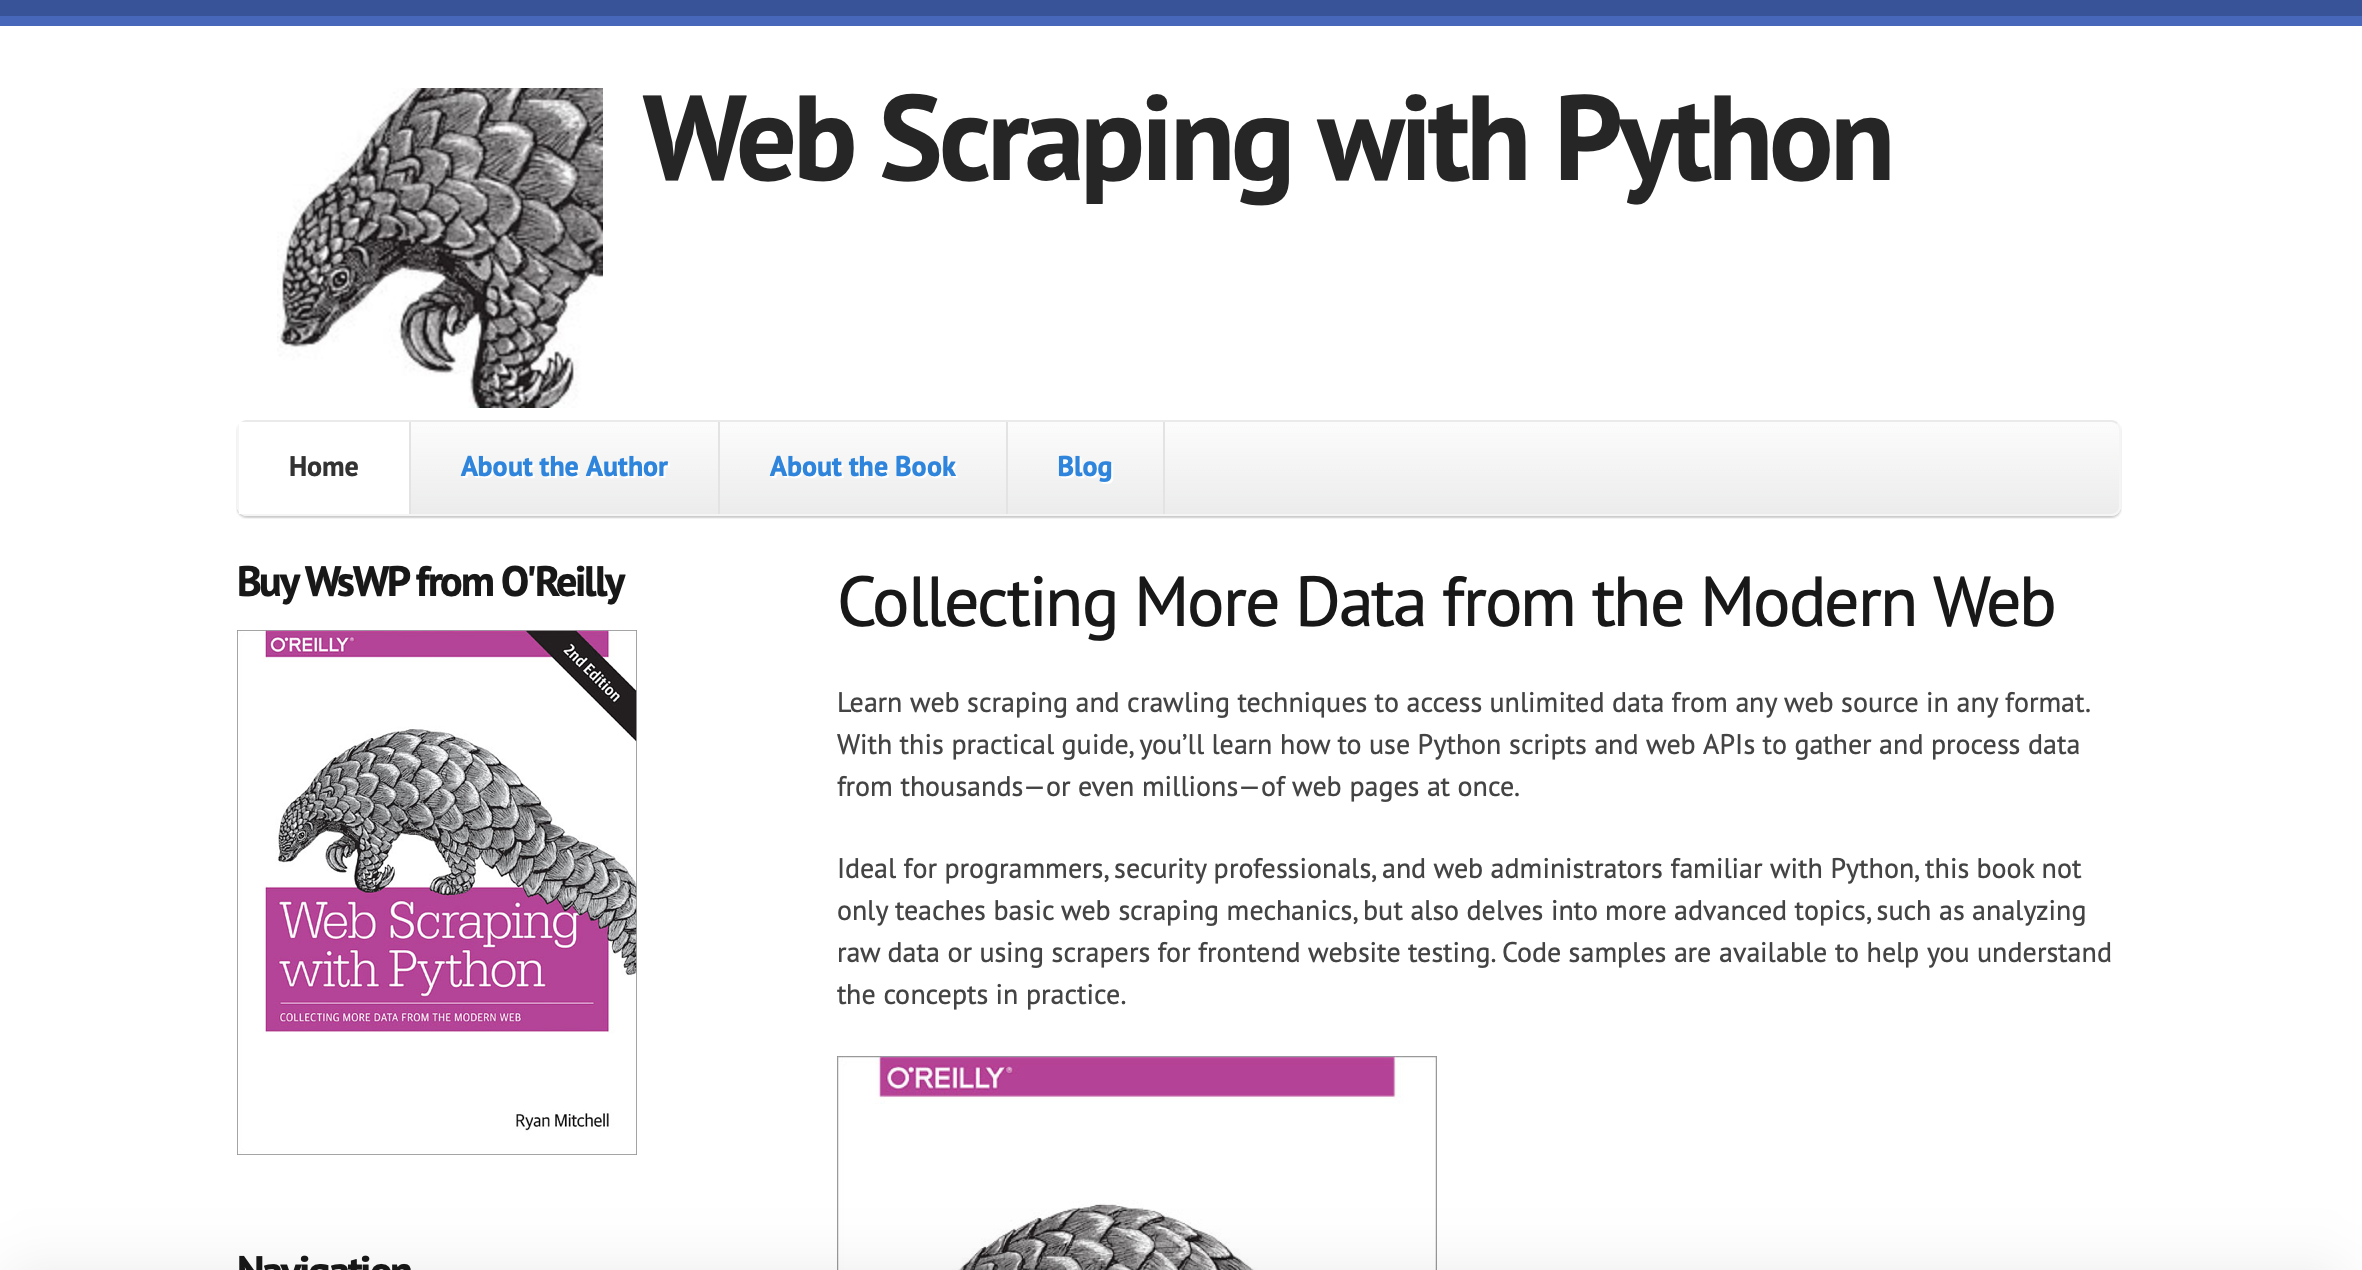


In [1]:
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com')
bs = BeautifulSoup(html, 'html.parser')
imageLocation = bs.find('a', {'id': 'logo'}).find('img')['src']
urlretrieve (imageLocation, 'logo.jpg')

('logo.jpg', <http.client.HTTPMessage at 0x7f94bb7ba390>)

 -  downloads the logo from http://pythonscraping.com and stores it as logo.jpg in the same directory from which the script is running. 
  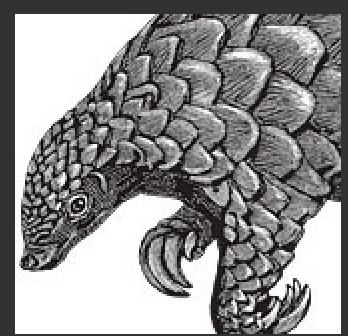

- following downloads all internal files, linked to by any tag’s src attribute, from the home page of http://pythonscraping.com:  
 - This script uses a lambda function (introduced in Chapter 2) to select all tags on the front page that have the src attribute,   
 - and then cleans and normalizes the URLs to get an absolute path for each download (making sure to discard external links).  
 - Then, each file is downloaded to its own path in the local folder downloaded on your own machine.  
   
#### os module   
 - acts as an interface between Python and the operating system.  
 - allowing it to manipulate file paths,   
 - create directories,   
 - get information about running processes and environment variables,  
 - many other useful things.

In [2]:
import os
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup

downloadDirectory = 'downloaded'
baseUrl = 'http://pythonscraping.com'

def getAbsoluteURL(baseUrl, source):
    if source.startswith('http://www.'):
        url = 'http://{}'.format(source[11:])
    elif source.startswith('http://'):
        url = source
    elif source.startswith('www.'):
        url = source[4:]
        url = 'http://{}'.format(source)
    else:
        url = '{}/{}'.format(baseUrl, source)
    if baseUrl not in url:
        return None
    return url

def getDownloadPath(baseUrl, absoluteUrl, downloadDirectory):
    path = absoluteUrl.replace('www.', '')
    path = path.replace(baseUrl, '')
    path = downloadDirectory+path
    directory = os.path.dirname(path)

    if not os.path.exists(directory):
        os.makedirs(directory)

    return path

html = urlopen('http://www.pythonscraping.com')
bs = BeautifulSoup(html, 'html.parser')
downloadList = bs.findAll(src=True)

for download in downloadList:
    fileUrl = getAbsoluteURL(baseUrl, download['src'])
    if fileUrl is not None:
        print(fileUrl)

http://pythonscraping.com/misc/jquery.js?v=1.4.4
http://pythonscraping.com/misc/jquery.once.js?v=1.2
http://pythonscraping.com/misc/drupal.js?q4na2g
http://pythonscraping.com/sites/all/themes/skeletontheme/js/jquery.mobilemenu.js?q4na2g
http://pythonscraping.com/sites/all/modules/google_analytics/googleanalytics.js?q4na2g
http://pythonscraping.com/sites/default/files/lrg_0.jpg
http://pythonscraping.com/https://covers.oreillystatic.com/images/0636920078067/lrg.jpg
http://pythonscraping.com/img/lrg%20(1).jpg


# Run with Caution  
***  
 - <font color=green>random bash scripts, .exe files, and other potential malware.  
 - This program is written for illustrative purposes only;   
 - it should not be randomly deployed without more extensive filename checking  
 - it should be run only in an account with limited permissions.  
 - As always, backing up your files, not storing sensitive information.</font>

# Storing Data to CSV  
***  
 - CSV, or comma-separated values  
 - If you’re looking to download CSV files directly off the web and store them locally, without any parsing or modification, you don’t need this section.  
  - If test.csv does not already exist, Python will create the file (but not the directory)  
  - If it already exists, Python will overwrite test.csv with the new data.

In [3]:
import csv

csvFile = open('test.csv', 'w+')
try:
    writer = csv.writer(csvFile)
    writer.writerow(('number', 'number plus 2', 'number times 2'))
    for i in range(10):
        writer.writerow( (i, i+2, i*2))
finally:
    csvFile.close()

  
  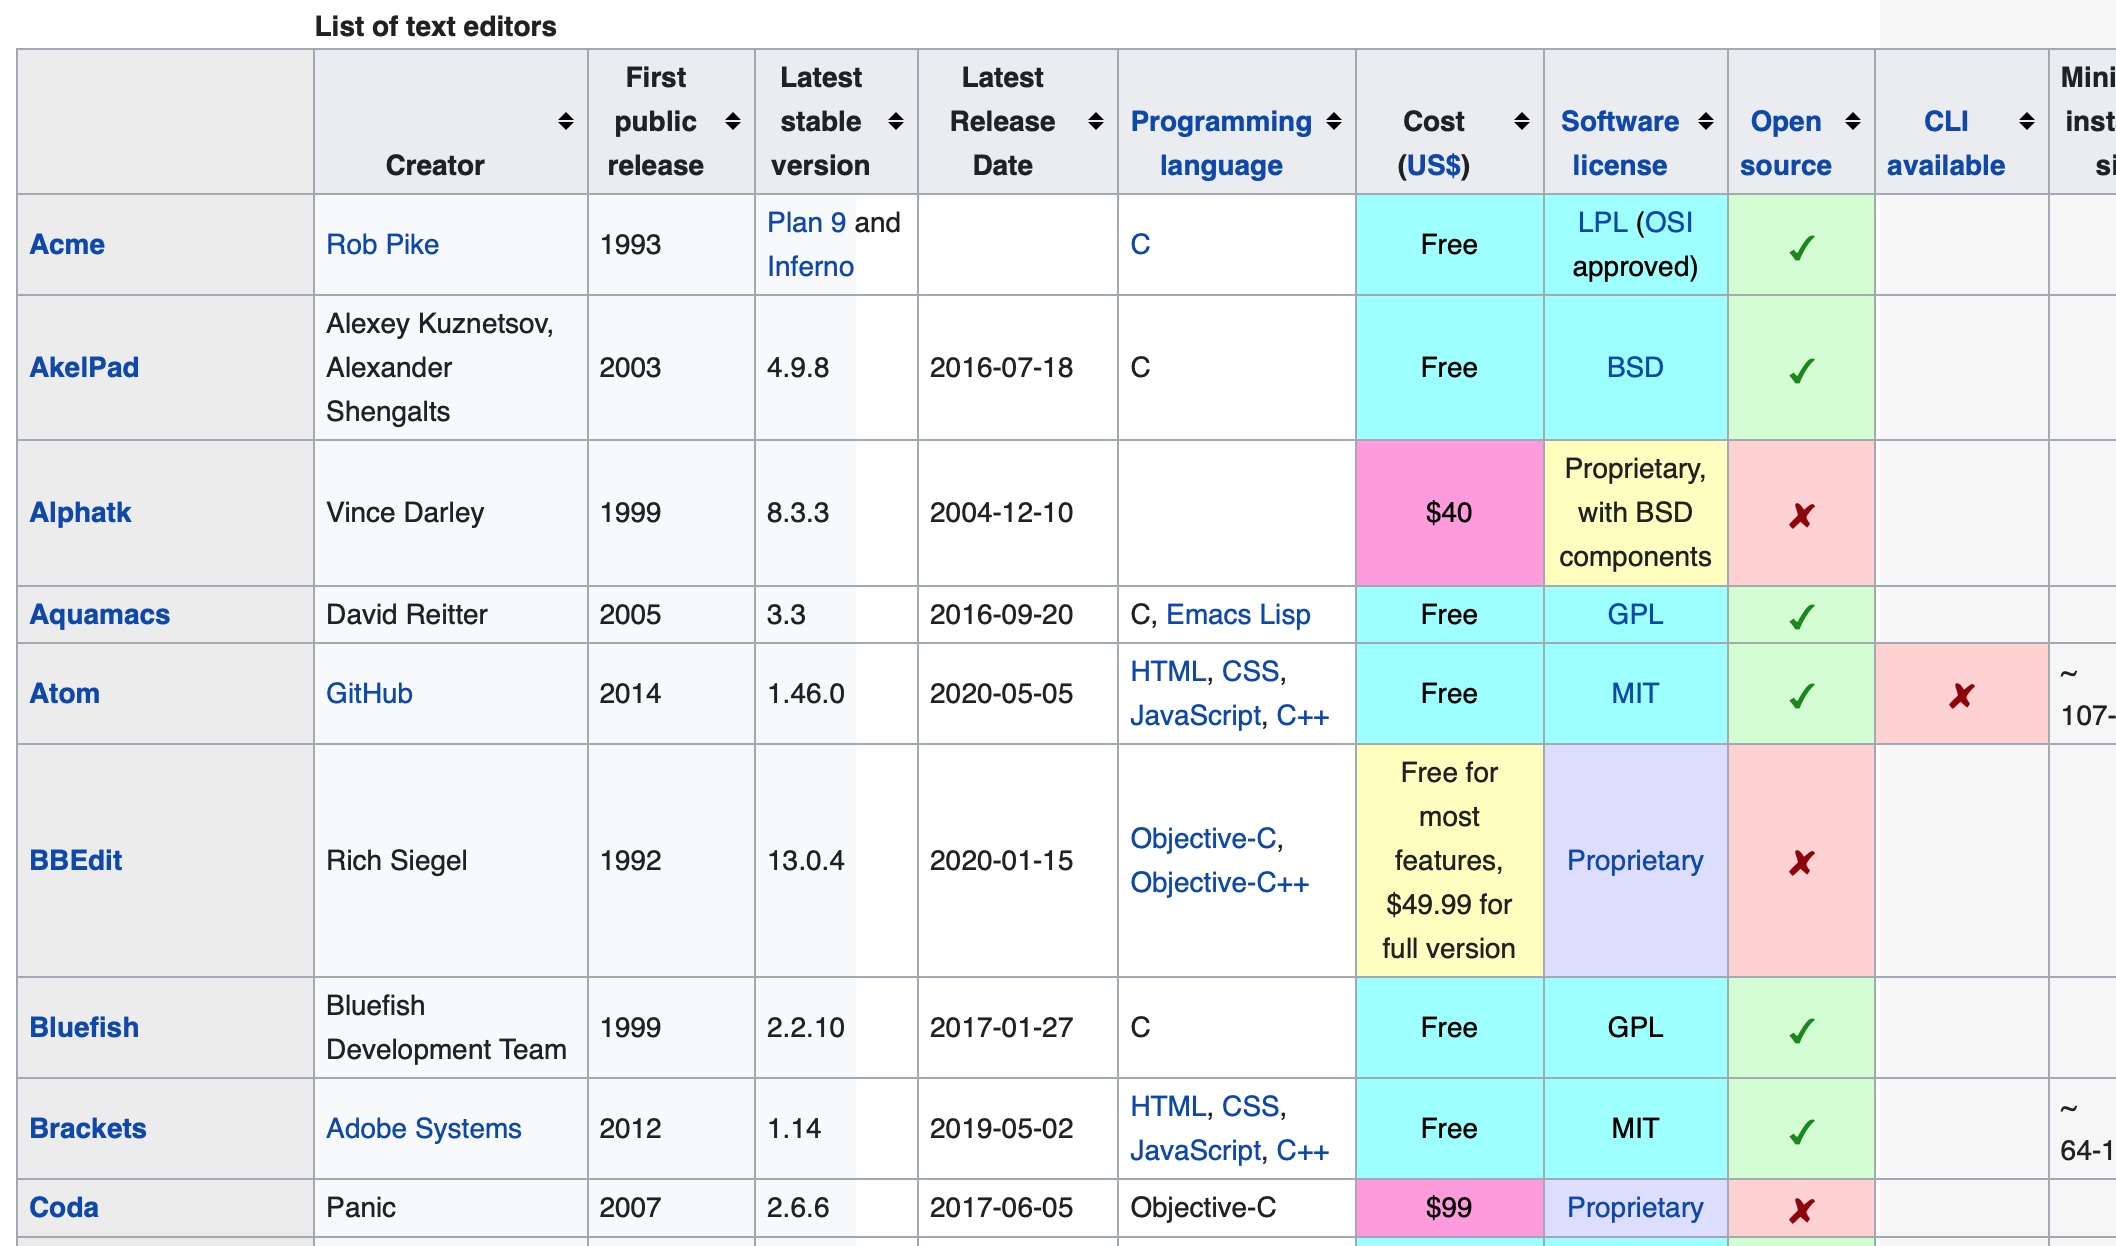


In [4]:
import csv
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://en.wikipedia.org/wiki/Comparison_of_text_editors')
bs = BeautifulSoup(html, 'html.parser')
# The main comparison table is currently the first table on the page
table = bs.findAll('table',{'class':'wikitable'})[0]
rows = table.findAll('tr')

csvFile = open('editors.csv', 'wt+')
writer = csv.writer(csvFile)
try:
    for row in rows:
        csvRow = []
        for cell in row.findAll(['td', 'th']):
            csvRow.append(cell.get_text())
        writer.writerow(csvRow)
finally:
    csvFile.close()

 - result should be a well-formatted CSV file saved locally, under ../files/editors.csv.  
  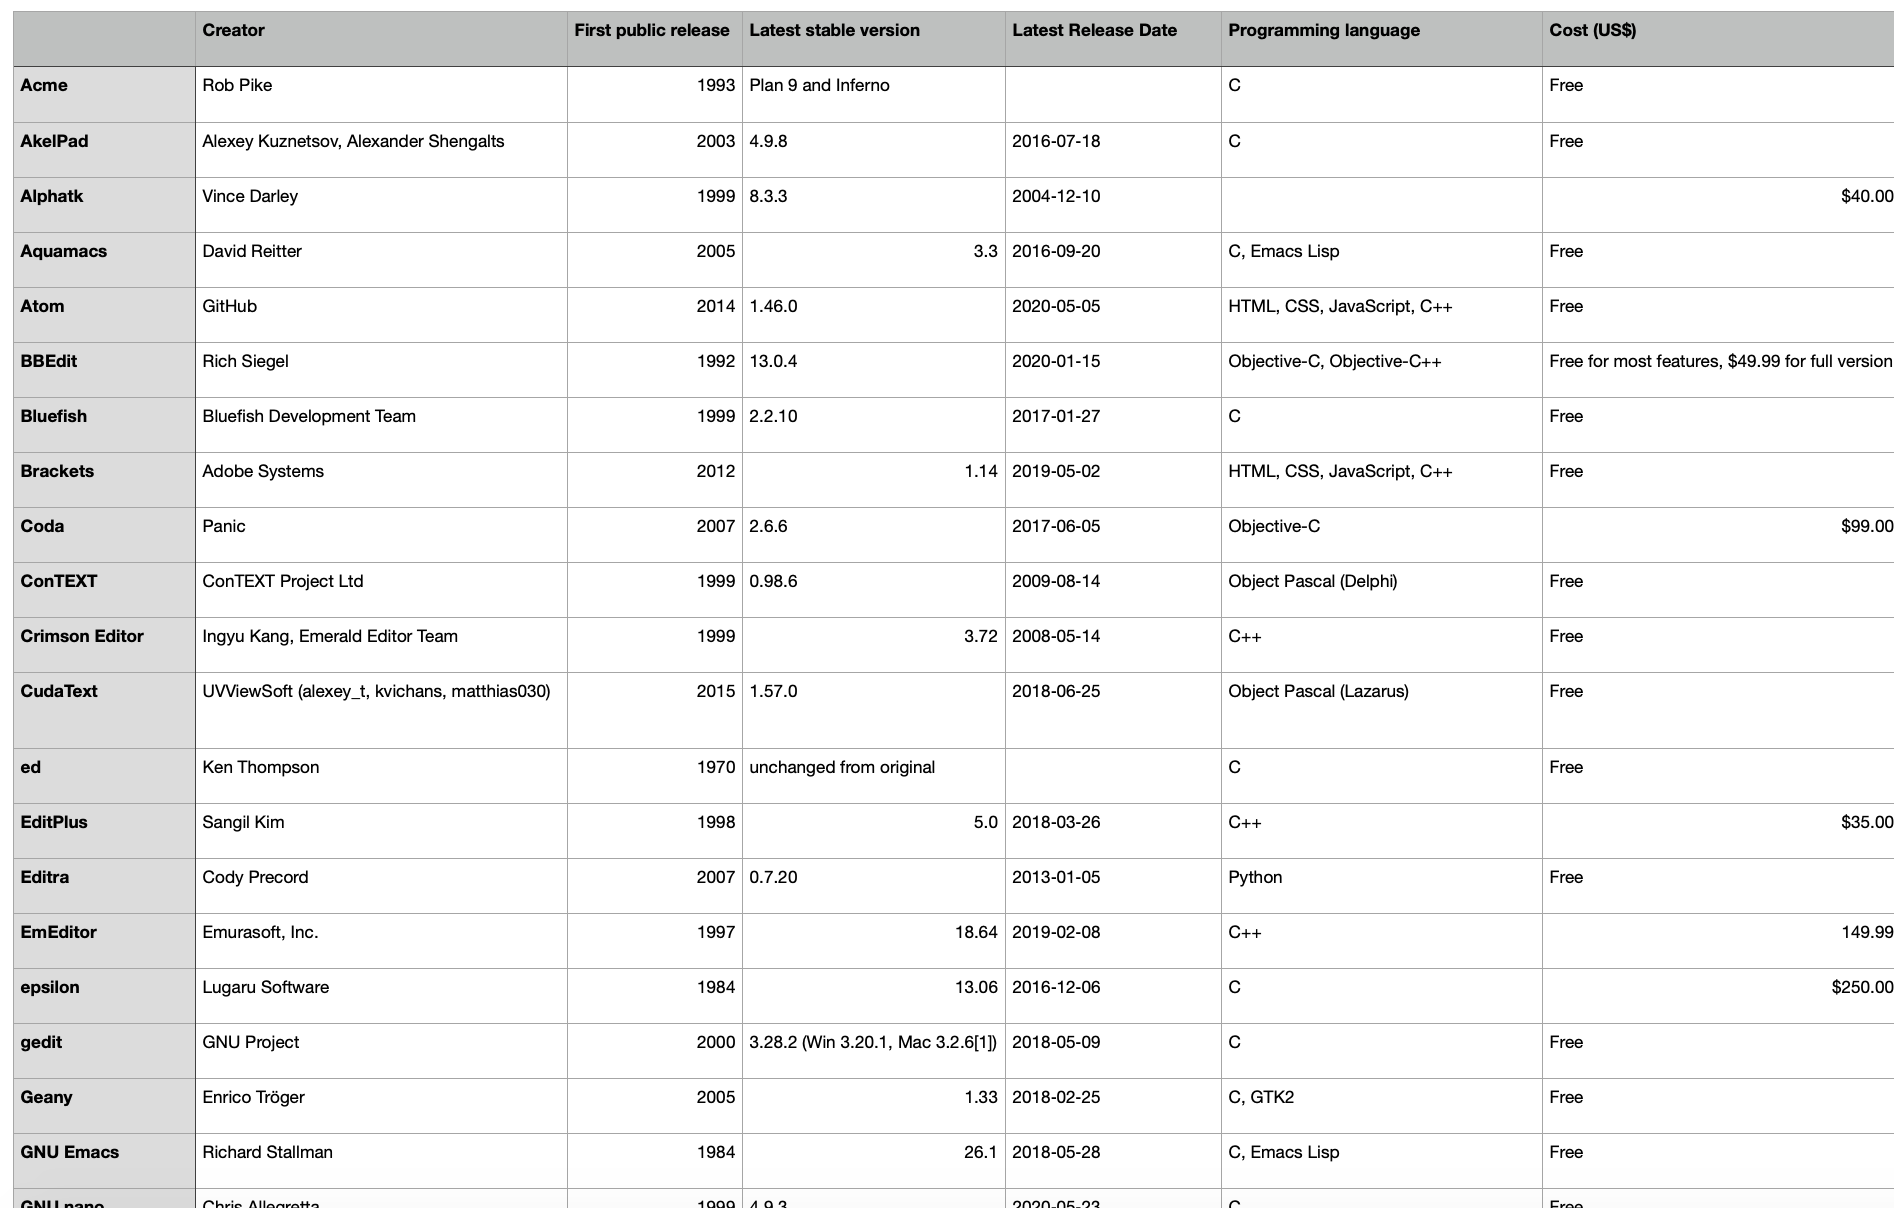

# MySQL. 
***  
 - most popular open source relational database management system

# Installing MySQL  
# MySQL on Mac  
***  
We've installed your MySQL database without a root password. To secure it run:
    mysql_secure_installation

MySQL is configured to only allow connections from localhost by default

To connect run:
    mysql -uroot

To have launchd start mysql now and restart at login:
  brew services start mysql
Or, if you don't want/need a background service you can just run:
  mysql.server start  
    
\$ cd /usr/local/mysql  

\$ sudo ./bin/mysqld_safe  
  
 mysql.server start  
 mysql_secure_install
 NYYYNY
 mysql -u root -p

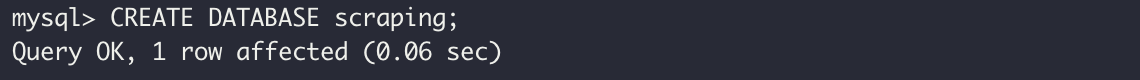

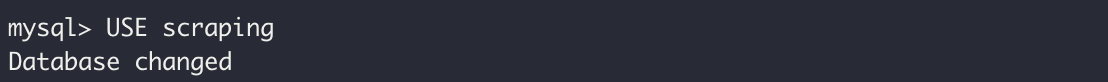

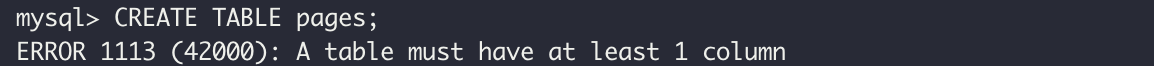  
 - MySQL cannot exist without columns

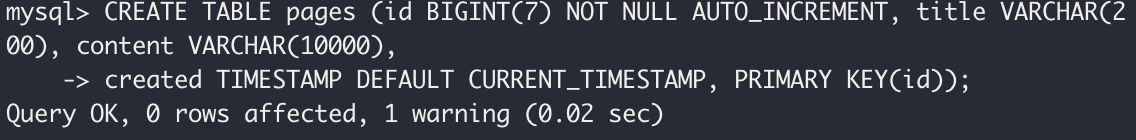  
  
 - The name (id, title, created, etc.)
 - The variable type (BIGINT(7), VARCHAR, TIMESTAMP)
 - Optionally, any additional attributes (NOT NULL AUTO_INCREMENT)

DESCRIBE pages;  
  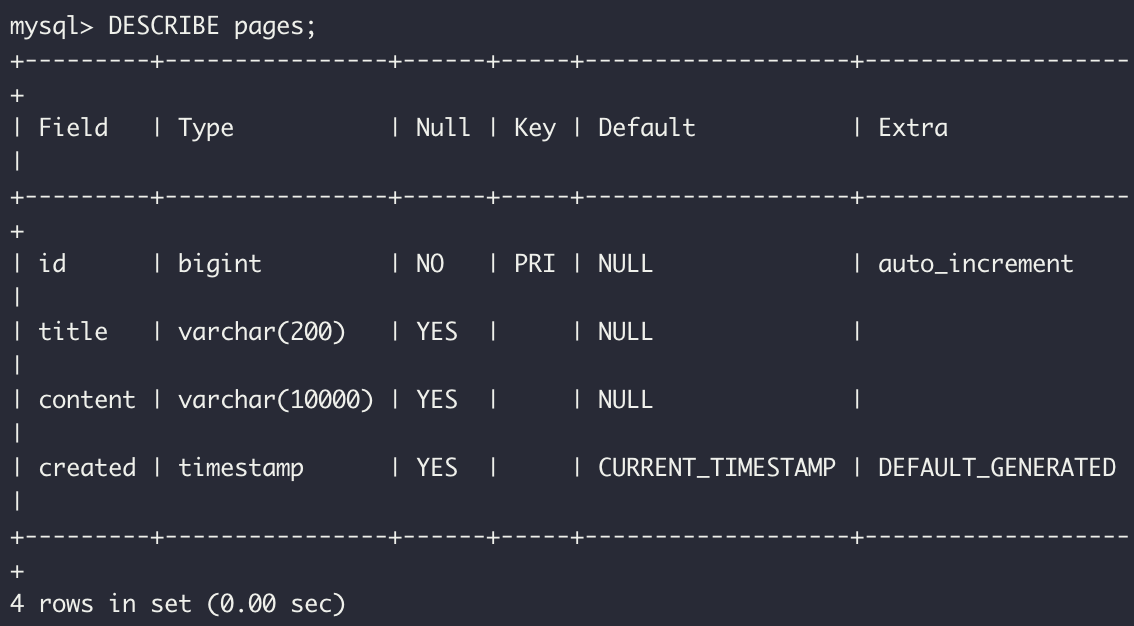

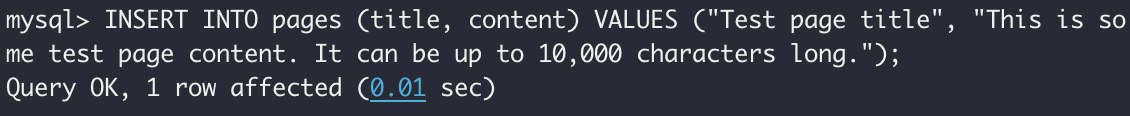

INSERT INTO pages (id, title, content, created) VALUES (3, "Test page title","This is some test page content. It can be up to 10,000 characters long.", "2014-09-21 10:25:32");  
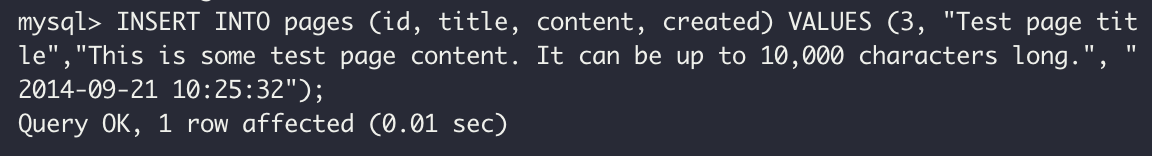  
  
 - As long as the integer you provide for the id column doesn’t already exist in the data‐ base, this override will work perfectly fine

 SELECT * FROM pages WHERE id = 2;  
  - Select all from pages where id equals 2  
   
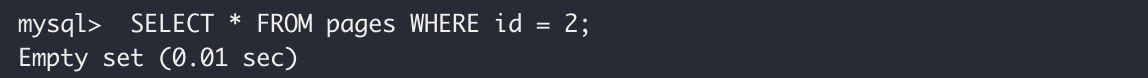   

SELECT * FROM pages WHERE title LIKE "%test%";   
 - (the % symbol acts as a wildcard in MySQL strings):
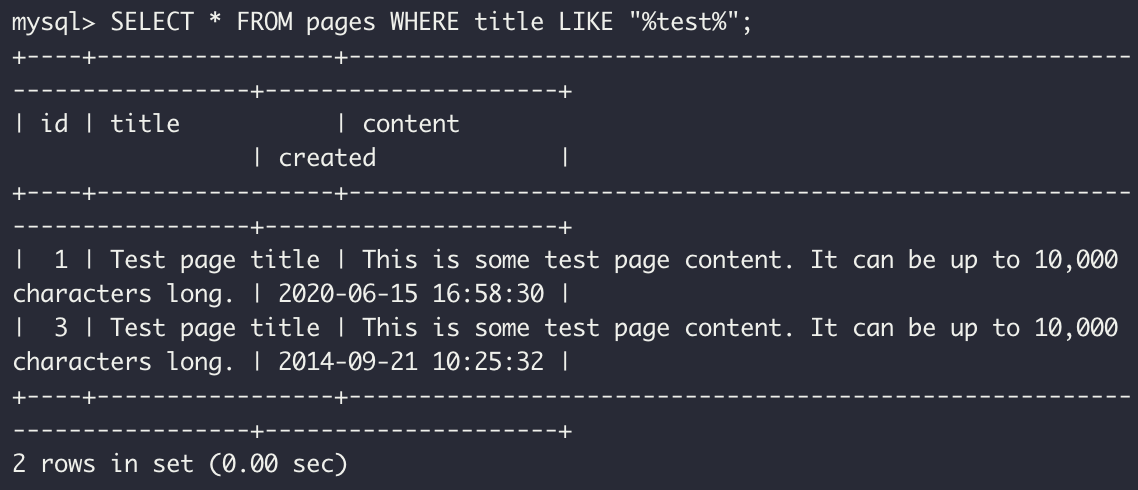

SELECT id, title FROM pages WHERE content LIKE "%page content%";   
 - This returns just the id and title where the content contains the phrase “page con‐
tent.”
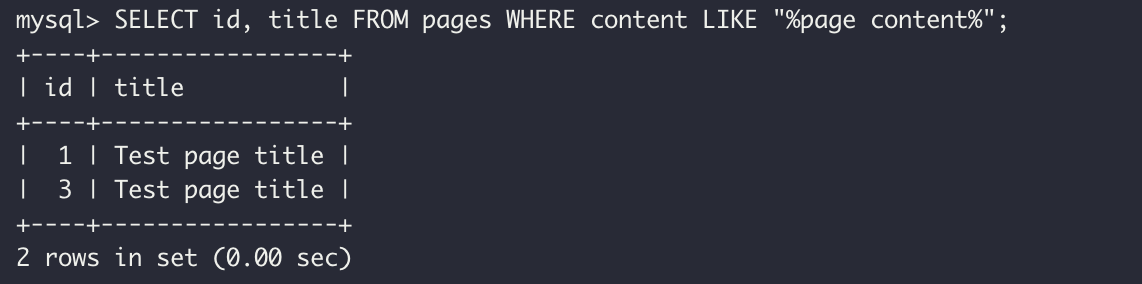

 DELETE FROM pages WHERE id = 1;  
  - to write any DELETE statements as a SELECT statement first (in this case, SELECT * FROM pages WHERE id = 1),
 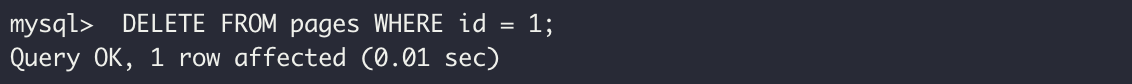

UPDATE pages SET title="A new title", content="Some new content" WHERE id=2;  
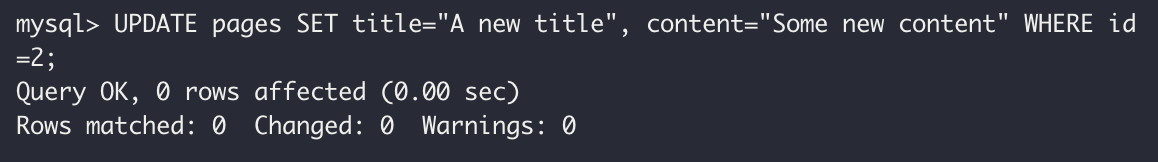

# Integrating with Python  
***  
 - $ pip install PyMySQL  

 #### connection object (conn)  
 #### cursor object (cur)  
 ***  
connection   
 - is responsible for connecting to the database  
 - also sending the database information  
 - handling rollbacks (when a query or set of queries needs to be aborted, and the database needs to be returned to its previous state)  
 - creating new cursor objects.  
   
connection can have many cursors.  
 - cursor keeps track of certain state information, such as which database it is using.  
 - If you have multiple databases and need to write information across all of them, you might have multiple cursors to handle this.  
 - A cursor also contains the results of the latest query it has executed.   
 - By calling functions on the cursor, such as <font color=pink>cur.fetchone()</font>, you can access this information.
  
<br>    
It is important that both the cursor and the connection are closed after you are finished using them.   
->  result in connection leaks
 - <font color=pink>cur.close()  
 - conn.close()</font>  
   


By default, MySQL does not handle Unicode. Fortunately, you can turn on this feature (just keep in mind that doing so will increase the size of your database

ALTER DATABASE scraping CHARACTER SET = utf8mb4 COLLATE = utf8mb4_unicode_ci;  
ALTER TABLE pages CONVERT TO CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci;  
ALTER TABLE pages CHANGE title title VARCHAR(200) CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci;  
ALTER TABLE pages CHANGE content content VARCHAR(10000) CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci;

In [8]:
import pymysql
conn = pymysql.connect(host='127.0.0.1', unix_socket='/tmp/mysql.sock',
                           user='root', passwd='0314', db='mysql')
cur = conn.cursor()
cur.execute('USE scraping') 
cur.execute('SELECT * FROM pages WHERE id=1') 
print(cur.fetchone())
cur.close()
conn.close()

None


- <font color=pink> "charset='utf8'"</font> is added to the database connection string. 
 - tells the connection that it should send all information to the database as UTF-8   

- <font color=pink>store function</font>  
 - takes in two string variables,  <font color=pink>title, content</font>, and adds them to an INSERT statement that is executed by the cursor.  
   
- <font color=pink>finally</font>  statement   
 - This ensures that, regardless of how the program is interrupted or the exceptions that might be thrown during its execution (and because the web is messy, you should always assume exceptions will be thrown), the cursor and the <font color=green>connection will both be closed immediately</font> before the program end

In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import pymysql
import re

conn = pymysql.connect(host='127.0.0.1', unix_socket='/tmp/mysql.sock',
                       user='root', passwd='password', db='mysql', charset='utf8')
cur = conn.cursor()
cur.execute('USE scraping')

random.seed(datetime.datetime.now())

def store(title, content):
    cur.execute('INSERT INTO pages (title, content) VALUES ("%s", "%s")', (title, content))
    cur.connection.commit()

def getLinks(articleUrl):
    html = urlopen('http://en.wikipedia.org'+articleUrl)
    bs = BeautifulSoup(html, 'html.parser')
    title = bs.find('h1').get_text()
    content = bs.find('div', {'id':'mw-content-text'}).find('p').get_text()
    store(title, content)
    return bs.find('div', {'id':'bodyContent'}).findAll('a', href=re.compile('^(/wiki/)((?!:).)*$'))

links = getLinks('/wiki/Kevin_Bacon')
try:
    while len(links) > 0:
         newArticle = links[random.randint(0, len(links)-1)].attrs['href']
         print(newArticle)
         links = getLinks(newArticle)
finally:
    cur.close()
    conn.close()

/wiki/Internet_Movie_Database
/wiki/The_Hollywood_Reporter
/wiki/ISBN_(identifier)
/wiki/ISBN_(identifier)
/wiki/135_film
/wiki/ISO-8859-8-I
/wiki/Simple_feature_access
/wiki/Tile_Map_Service
/wiki/REST
/wiki/OpenQRM
/wiki/Netlify
/wiki/Jeremy_Stoppelman
/wiki/NPR
/wiki/Staggered_board_of_directors
/wiki/Securities_and_Exchange_Commission
/wiki/Williams_Act
/wiki/Regulation_D_(SEC)
/wiki/Exempt_market_securities
/wiki/Fundamental_analysis
/wiki/New_York_Institute_of_Finance
/wiki/Security_(finance)
/wiki/Public_finance
/wiki/Government_budget
/wiki/David_R._Henderson
/wiki/Canadians
/wiki/History_of_Canadian_women
/wiki/Newfoundland_and_Labrador
/wiki/Michael_Crummey
/wiki/Wayne_Johnston_(writer)
/wiki/Scotiabank_Giller_Prize
/wiki/Eden_Robinson
/wiki/Nino_Ricci
/wiki/Gabrielle_Roy
/wiki/Literary_realism
/wiki/Dramatic_convention
/wiki/Musical_theatre
/wiki/President_of_the_United_States
/wiki/George_W._Bush
/wiki/Wallis_Simpson
/wiki/William_Lyon_Mackenzie_King
/wiki/John_Diefenbaker


KeyboardInterrupt: 

# Database Techniques and Good Practice
***  
 1. <font color=green>Always add id columns</font> to your tables.  
  - All tables in MySQL must have at least one primary key (the key column that MySQL sorts on)  
 2. Second, <font color=green>use intelligent indexing</font>.   
  - dictionary (like the book, not the Python object) is a list of words indexed alphabetically.   
  <br>
  - Keep in mind, though, that adding indexing requires more space for the new index, as well as additional processing time when inserting.
  - \$ SELECT * FROM dictionary WHERE definition="A small furry animal that says meow";   
  
  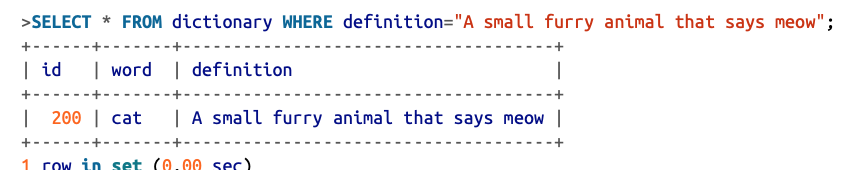
  
  - To make this “definitions” index a little lighter, you can tell MySQL to index only the first few characters in the column value. This command creates an index on the first 16 characters in the definition field:  
     - $ CREATE INDEX definition ON dictionary (id, definition(16));  
     - This index will make your lookups much faster when searching for words by their full definition. 

#### On the subject of query time versus database size  
 - (one of the fundamental balancing acts in database engineering),  
  - one of the <font color=green>common mistakes made</font>, especially with web scraping of large amounts of natural text data, <font color=green>is to store lots of repeating data</font>.

#### splitting the data into three separate tables,   
 - you can shrink your dataset enormously:  
 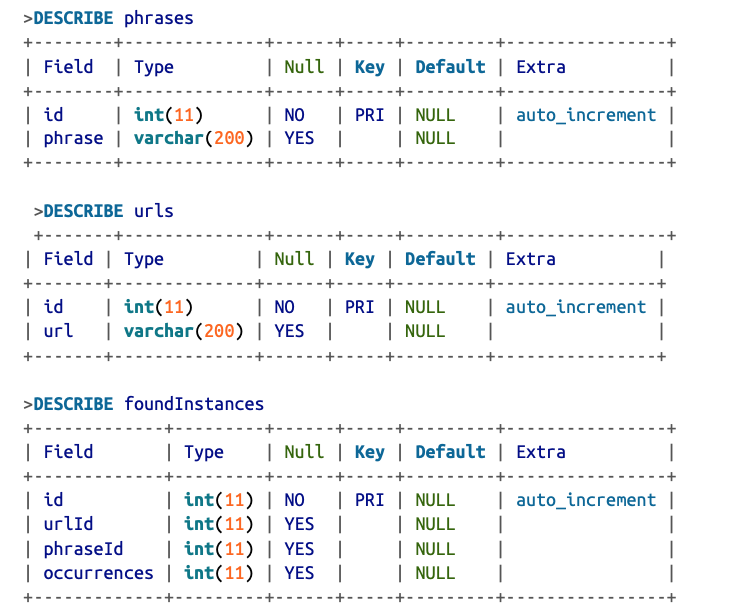  
   
 - majority of the columns are just integer id fields. These take up far less space.  
 - full text of each URL and phrase is stored exactly once.


 it can be impossible to tell when a piece of data was added, updated, or removed from your database.  
  - You might want to consider keeping several timestamps in place:<font color=pink>created, updated, deleted</font>.

# “Six Degrees” in MySQL  
***    
 - the goal is to find the connection between any two Wikipedia articles through a series of links  
 - Autoincremented id columns, timestamps, and multiple tables: they all come into play here.   
 - final solution for getting from Kevin Bacon to Eric Idle, see “Six Degrees of Wikipedia: Conclusion” on <font color=green>page 139</font>

CREATE DATABASE wikipedia  

CREATE TABLE `wikipedia`.`pages` (
`id` INT NOT NULL AUTO_INCREMENT,
`url` VARCHAR(255) NOT NULL,
`created` TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP, PRIMARY KEY (`id`));
  
CREATE TABLE `wikipedia`.`links` ( `id` INT NOT NULL AUTO_INCREMENT, `fromPageId` INT NULL,
`toPageId` INT NULL,
`created` TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP, PRIMARY KEY (`id`));

#### code  
<font color=pink>insertPageIfNotExists</font>  
 - This function inserts a new page record if it does not exist already.   
 - This, along with the running list of all collected pages stored in pages, ensures that page records are not duplicated.   
 - It also serves to look up pageId numbers in order to create new links.  

<font color=pink>insertLink</font>  
 - This creates a new link record in the database.   
 - It will not create a link if that link already exists. Even if two or more identical links do exist on the page, for our purposes, they are the same link, represent the same relationship, and should be counted as only one record.   
 - This also helps maintain the integrity of the database if the program is run multiple times, even over the same pages.  
  
<font color=pink>loadPages</font>  
 - This loads all current pages from the database into a list, so that it can be determined whether a new page should be visited. Pages are also collected during runtime, so if this crawler is run only once, starting with an empty database, in theory loadPage should not be needed.   
 - In practice, however, problems may arise. The network might go down, or you might want to collect links over several periods of time, and it’s important for the crawler to be able to reload itself and not lose any ground.

In [14]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pymysql
from random import shuffle

conn = pymysql.connect(host='127.0.0.1', unix_socket='/tmp/mysql.sock',
                       user='root', passwd='0314', db='mysql', charset='utf8')
cur = conn.cursor()
cur.execute('USE wikipedia')

def insertPageIfNotExists(url):
    cur.execute('SELECT * FROM pages WHERE url = %s', (url))
    if cur.rowcount == 0:
        cur.execute('INSERT INTO pages (url) VALUES (%s)', (url))
        conn.commit()
        return cur.lastrowid
    else:
        return cur.fetchone()[0]

def loadPages():
    cur.execute('SELECT * FROM pages')
    pages = [row[1] for row in cur.fetchall()]
    return pages

def insertLink(fromPageId, toPageId):
    cur.execute('SELECT * FROM links WHERE fromPageId = %s AND toPageId = %s', 
                  (int(fromPageId), int(toPageId)))
    if cur.rowcount == 0:
        cur.execute('INSERT INTO links (fromPageId, toPageId) VALUES (%s, %s)', 
                    (int(fromPageId), int(toPageId)))
        conn.commit()
def pageHasLinks(pageId):
    cur.execute('SELECT * FROM links WHERE fromPageId = %s', (int(pageId)))
    rowcount = cur.rowcount
    if rowcount == 0:
        return False
    return True

def getLinks(pageUrl, recursionLevel, pages):
    if recursionLevel > 4:
        return

    pageId = insertPageIfNotExists(pageUrl)
    html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
    bs = BeautifulSoup(html, 'html.parser')
    links = bs.findAll('a', href=re.compile('^(/wiki/)((?!:).)*$'))
    links = [link.attrs['href'] for link in links]

    for link in links:
        linkId = insertPageIfNotExists(link)
        insertLink(pageId, linkId)
        if not pageHasLinks(linkId):
            print("PAGE HAS NO LINKS: {}".format(link))
            pages.append(link)
            getLinks(link, recursionLevel+1, pages)
        
        
getLinks('/wiki/Kevin_Bacon', 0, loadPages()) 
cur.close()
conn.close()

PAGE HAS NO LINKS: /wiki/Kevin_Bacon_(disambiguation)
PAGE HAS NO LINKS: /wiki/Kevin_Bacon_(producer)
PAGE HAS NO LINKS: /wiki/Rotherham
PAGE HAS NO LINKS: /wiki/Rotherham_(disambiguation)
PAGE HAS NO LINKS: /wiki/Rotherham_(UK_Parliament_constituency)
PAGE HAS NO LINKS: /wiki/Metropolitan_Borough_of_Rotherham
PAGE HAS NO LINKS: /wiki/Rotherham,_New_Zealand
PAGE HAS NO LINKS: /wiki/Alan_Rotherham
PAGE HAS NO LINKS: /wiki/Arthur_Rotherham
PAGE HAS NO LINKS: /wiki/Gerard_Rotherham
PAGE HAS NO LINKS: /wiki/Hugh_Rotherham
PAGE HAS NO LINKS: /wiki/Joseph_Bryant_Rotherham
PAGE HAS NO LINKS: /wiki/Roland_Rotherham
PAGE HAS NO LINKS: /wiki/Thomas_Rotherham
PAGE HAS NO LINKS: /wiki/Edward_Rotheram
PAGE HAS NO LINKS: /wiki/Steve_Rotheram
PAGE HAS NO LINKS: /wiki/HMS_Rotherham_(H09)
PAGE HAS NO LINKS: /wiki/Baron_Rotherham
PAGE HAS NO LINKS: /wiki/Rotherham_United_F.C.
PAGE HAS NO LINKS: /wiki/Rotherham_child_sexual_exploitation_scandal
PAGE HAS NO LINKS: /wiki/Main_Page
PAGE HAS NO LINKS: /wiki/

PAGE HAS NO LINKS: /wiki/List_of_urban_areas_in_the_United_Kingdom
PAGE HAS NO LINKS: /wiki/Sheffield_City_Region
PAGE HAS NO LINKS: /wiki/Leeds_City_Region
PAGE HAS NO LINKS: /wiki/South_Yorkshire_County_Council
PAGE HAS NO LINKS: /wiki/Unitary_authority
PAGE HAS NO LINKS: /wiki/Ceremonial_counties_of_England
PAGE HAS NO LINKS: /wiki/Lord_Lieutenant_of_South_Yorkshire
PAGE HAS NO LINKS: /wiki/High_Sheriff_of_South_Yorkshire
PAGE HAS NO LINKS: /wiki/West_Riding_of_Yorkshire
PAGE HAS NO LINKS: /wiki/Administrative_counties_of_England
PAGE HAS NO LINKS: /wiki/County_borough
PAGE HAS NO LINKS: /wiki/History_of_Sheffield
PAGE HAS NO LINKS: /wiki/History_of_Yorkshire
PAGE HAS NO LINKS: /wiki/Prehistoric
PAGE HAS NO LINKS: /wiki/Mesolithic
PAGE HAS NO LINKS: /wiki/Deepcar
PAGE HAS NO LINKS: /wiki/Creswell_Crags
PAGE HAS NO LINKS: /wiki/Derbyshire
PAGE HAS NO LINKS: /wiki/Upper_Palaeolithic
PAGE HAS NO LINKS: /wiki/Mining
PAGE HAS NO LINKS: /wiki/Steel
PAGE HAS NO LINKS: /wiki/Pennines
PAGE H

PAGE HAS NO LINKS: /wiki/Culture_of_Sheffield
PAGE HAS NO LINKS: /wiki/Abbeydale_Industrial_Hamlet
PAGE HAS NO LINKS: /wiki/Brodsworth_Hall
PAGE HAS NO LINKS: /wiki/Cannon_Hall
PAGE HAS NO LINKS: /wiki/Chapel_of_Our_Lady_of_Rotherham_Bridge
PAGE HAS NO LINKS: /wiki/Clifton_Park_Museum
PAGE HAS NO LINKS: /wiki/Conisbrough_Castle
PAGE HAS NO LINKS: /wiki/Cusworth_Hall
PAGE HAS NO LINKS: /wiki/Mansion_House,_Doncaster
PAGE HAS NO LINKS: /wiki/Elsecar_Steam_Railway
PAGE HAS NO LINKS: /wiki/Howden_Edge
PAGE HAS NO LINKS: /wiki/Kelham_Island_Museum
PAGE HAS NO LINKS: /wiki/Sheffield
PAGE HAS NO LINKS: /wiki/Magna_Science_Adventure_Centre
PAGE HAS NO LINKS: /wiki/Meadowhall_Centre
PAGE HAS NO LINKS: /wiki/Monk_Bretton_Priory
PAGE HAS NO LINKS: /wiki/Pot_House_Hamlet
PAGE HAS NO LINKS: /wiki/Sheffield_Winter_Gardens
PAGE HAS NO LINKS: /wiki/Roche_Abbey
PAGE HAS NO LINKS: /wiki/Rother_Valley_Country_Park
PAGE HAS NO LINKS: /wiki/RSPB_Old_Moor_Wetland_Centre
PAGE HAS NO LINKS: /wiki/Ulley_Reserv

PAGE HAS NO LINKS: /wiki/Census_in_the_United_Kingdom
PAGE HAS NO LINKS: /wiki/Internet
PAGE HAS NO LINKS: /wiki/Office_for_National_Statistics
PAGE HAS NO LINKS: /wiki/England
PAGE HAS NO LINKS: /wiki/Wales
PAGE HAS NO LINKS: /wiki/General_Register_Office_for_Scotland
PAGE HAS NO LINKS: /wiki/Scotland
PAGE HAS NO LINKS: /wiki/Northern_Ireland_Statistics_and_Research_Agency
PAGE HAS NO LINKS: /wiki/Northern_Ireland
PAGE HAS NO LINKS: /wiki/UK_Statistics_Authority
PAGE HAS NO LINKS: /wiki/List_of_national_and_international_statistical_services
PAGE HAS NO LINKS: /wiki/Jil_Matheson
PAGE HAS NO LINKS: /wiki/Office_for_National_Statistics
PAGE HAS NO LINKS: /wiki/Lockheed_Martin_UK
PAGE HAS NO LINKS: /wiki/Census_Act_1920
PAGE HAS NO LINKS: /wiki/Lockheed_Martin_UK
PAGE HAS NO LINKS: /wiki/Aerospace_manufacturer
PAGE HAS NO LINKS: /wiki/Defense_(military)
PAGE HAS NO LINKS: /wiki/Information_security
PAGE HAS NO LINKS: /wiki/Lockheed_Martin
PAGE HAS NO LINKS: /wiki/PATRIOT_Act
PAGE HAS NO 

PAGE HAS NO LINKS: /wiki/Isle_of_Man
PAGE HAS NO LINKS: /wiki/Irish_grid_reference_system
PAGE HAS NO LINKS: /wiki/Ordnance_Survey_of_Ireland
PAGE HAS NO LINKS: /wiki/Ordnance_Survey_of_Northern_Ireland
PAGE HAS NO LINKS: /wiki/Universal_Transverse_Mercator_coordinate_system
PAGE HAS NO LINKS: /wiki/Channel_Islands
PAGE HAS NO LINKS: /wiki/Irish_Transverse_Mercator
PAGE HAS NO LINKS: /wiki/Military_Grid_Reference_System
PAGE HAS NO LINKS: /wiki/The_Wash
PAGE HAS NO LINKS: /wiki/North_Sea
PAGE HAS NO LINKS: /wiki/Lincolnshire
PAGE HAS NO LINKS: /wiki/Norfolk
PAGE HAS NO LINKS: /wiki/Map_datum
PAGE HAS NO LINKS: /wiki/George_Biddell_Airy
PAGE HAS NO LINKS: /wiki/Reference_ellipsoid
PAGE HAS NO LINKS: /wiki/Retriangulation_of_Great_Britain
PAGE HAS NO LINKS: /wiki/Cassini_Grid
PAGE HAS NO LINKS: /wiki/World_War_II
PAGE HAS NO LINKS: /wiki/Global_Positioning_System
PAGE HAS NO LINKS: /wiki/Geodetic_Reference_System_1980
PAGE HAS NO LINKS: /wiki/Transverse_Mercator_projection
PAGE HAS NO LI

PAGE HAS NO LINKS: /wiki/Shires_of_Scotland
PAGE HAS NO LINKS: /wiki/Local_government_in_Wales
PAGE HAS NO LINKS: /wiki/History_of_local_government_in_Wales
PAGE HAS NO LINKS: /wiki/Preserved_counties_of_Wales
PAGE HAS NO LINKS: /wiki/Local_government_in_Wales
PAGE HAS NO LINKS: /wiki/Community_(Wales)
PAGE HAS NO LINKS: /wiki/List_of_communities_in_Wales
PAGE HAS NO LINKS: /wiki/Historic_counties_of_Wales
PAGE HAS NO LINKS: /wiki/England
PAGE HAS NO LINKS: /wiki/History_of_England
PAGE HAS NO LINKS: /wiki/Timeline_of_English_history
PAGE HAS NO LINKS: /wiki/History_of_education_in_England
PAGE HAS NO LINKS: /wiki/History_of_local_government_in_England
PAGE HAS NO LINKS: /wiki/Maritime_history_of_England
PAGE HAS NO LINKS: /wiki/Military_history_of_England
PAGE HAS NO LINKS: /wiki/Social_history_of_England
PAGE HAS NO LINKS: /wiki/Prehistoric_Britain
PAGE HAS NO LINKS: /wiki/Roman_Britain
PAGE HAS NO LINKS: /wiki/Lloegyr
PAGE HAS NO LINKS: /wiki/Anglo-Saxon_England
PAGE HAS NO LINKS: /

PAGE HAS NO LINKS: /wiki/Treeton
PAGE HAS NO LINKS: /wiki/Ulley
PAGE HAS NO LINKS: /wiki/Wales,_South_Yorkshire
PAGE HAS NO LINKS: /wiki/Wath-upon-Dearne
PAGE HAS NO LINKS: /wiki/Waverley,_Rotherham
PAGE HAS NO LINKS: /wiki/Wentworth,_South_Yorkshire
PAGE HAS NO LINKS: /wiki/West_Melton
PAGE HAS NO LINKS: /wiki/Whiston,_South_Yorkshire
PAGE HAS NO LINKS: /wiki/Wickersley
PAGE HAS NO LINKS: /wiki/Woodsetts
PAGE HAS NO LINKS: /wiki/Rotherham_local_elections
PAGE HAS NO LINKS: /wiki/Labour_Party_(UK)
PAGE HAS NO LINKS: /wiki/UK_Independence_Party
PAGE HAS NO LINKS: /wiki/Conservative_Party_(UK)
PAGE HAS NO LINKS: /wiki/British_National_Party
PAGE HAS NO LINKS: /wiki/2016_Rotherham_Council_election
PAGE HAS NO LINKS: /wiki/2014_Rotherham_Council_election
PAGE HAS NO LINKS: /wiki/2012_Rotherham_Council_election
PAGE HAS NO LINKS: /wiki/2010_Rotherham_Council_election
PAGE HAS NO LINKS: /wiki/2007_Rotherham_Council_election
PAGE HAS NO LINKS: /wiki/Office_for_National_Statistics
PAGE HAS NO 

PAGE HAS NO LINKS: /wiki/Walsall_Metropolitan_Borough_Council_elections
PAGE HAS NO LINKS: /wiki/Wigan_Metropolitan_Borough_Council_elections
PAGE HAS NO LINKS: /wiki/Wirral_Metropolitan_Borough_Council_elections
PAGE HAS NO LINKS: /wiki/Wolverhampton_City_Council_elections
PAGE HAS NO LINKS: /wiki/Geographic_coordinate_system
PAGE HAS NO LINKS: /wiki/Main_Page
PAGE HAS NO LINKS: /wiki/Main_Page
PAGE HAS NO LINKS: /wiki/Metropolitan_and_non-metropolitan_counties_of_England
PAGE HAS NO LINKS: /wiki/Regions_of_England
PAGE HAS NO LINKS: /wiki/Local_Government_Act_1972
PAGE HAS NO LINKS: /wiki/Metropolitan_county
PAGE HAS NO LINKS: /wiki/Non-metropolitan_county
PAGE HAS NO LINKS: /wiki/Unitary_authorities_of_England
PAGE HAS NO LINKS: /wiki/Metropolitan_district
PAGE HAS NO LINKS: /wiki/Non-metropolitan_district
PAGE HAS NO LINKS: /wiki/Politics_of_England
PAGE HAS NO LINKS: /wiki/Monarchy_of_the_United_Kingdom
PAGE HAS NO LINKS: /wiki/Monarchy_of_the_United_Kingdom
PAGE HAS NO LINKS: /wi

PAGE HAS NO LINKS: /wiki/Staffordshire
PAGE HAS NO LINKS: /wiki/Stoke-on-Trent
PAGE HAS NO LINKS: /wiki/West_Midlands_(county)
PAGE HAS NO LINKS: /wiki/Warwickshire
PAGE HAS NO LINKS: /wiki/Leicestershire
PAGE HAS NO LINKS: /wiki/Leicester
PAGE HAS NO LINKS: /wiki/Rutland
PAGE HAS NO LINKS: /wiki/Northamptonshire
PAGE HAS NO LINKS: /wiki/Peterborough
PAGE HAS NO LINKS: /wiki/Cambridgeshire
PAGE HAS NO LINKS: /wiki/Norfolk
PAGE HAS NO LINKS: /wiki/Suffolk
PAGE HAS NO LINKS: /wiki/Essex
PAGE HAS NO LINKS: /wiki/Southend-on-Sea
PAGE HAS NO LINKS: /wiki/Thurrock
PAGE HAS NO LINKS: /wiki/Hertfordshire
PAGE HAS NO LINKS: /wiki/Borough_of_Bedford
PAGE HAS NO LINKS: /wiki/Central_Bedfordshire
PAGE HAS NO LINKS: /wiki/Luton
PAGE HAS NO LINKS: /wiki/Milton_Keynes_(borough)
PAGE HAS NO LINKS: /wiki/Buckinghamshire
PAGE HAS NO LINKS: /wiki/Oxfordshire
PAGE HAS NO LINKS: /wiki/Gloucestershire
PAGE HAS NO LINKS: /wiki/Worcestershire
PAGE HAS NO LINKS: /wiki/Herefordshire
PAGE HAS NO LINKS: /wiki/Sou

PAGE HAS NO LINKS: /wiki/Humberside
PAGE HAS NO LINKS: /wiki/Cleveland,_England
PAGE HAS NO LINKS: /wiki/York
PAGE HAS NO LINKS: /wiki/North_Yorkshire
PAGE HAS NO LINKS: /wiki/Bournemouth
PAGE HAS NO LINKS: /wiki/Darlington_(borough)
PAGE HAS NO LINKS: /wiki/Derby
PAGE HAS NO LINKS: /wiki/Leicester
PAGE HAS NO LINKS: /wiki/Luton
PAGE HAS NO LINKS: /wiki/Milton_Keynes_(borough)
PAGE HAS NO LINKS: /wiki/Poole
PAGE HAS NO LINKS: /wiki/Portsmouth
PAGE HAS NO LINKS: /wiki/Rutland
PAGE HAS NO LINKS: /wiki/Southampton
PAGE HAS NO LINKS: /wiki/Stoke-on-Trent
PAGE HAS NO LINKS: /wiki/Borough_of_Swindon
PAGE HAS NO LINKS: /wiki/Brighton
PAGE HAS NO LINKS: /wiki/Hove
PAGE HAS NO LINKS: /wiki/Brighton_and_Hove
PAGE HAS NO LINKS: /wiki/Blackburn_with_Darwen
PAGE HAS NO LINKS: /wiki/Blackpool
PAGE HAS NO LINKS: /wiki/Halton_(borough)
PAGE HAS NO LINKS: /wiki/Nottingham
PAGE HAS NO LINKS: /wiki/Peterborough
PAGE HAS NO LINKS: /wiki/Plymouth
PAGE HAS NO LINKS: /wiki/Southend-on-Sea
PAGE HAS NO LINKS: 

PAGE HAS NO LINKS: /wiki/2021_London_mayoral_election
PAGE HAS NO LINKS: /wiki/2000_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2004_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2008_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2012_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2016_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2021_London_Assembly_election
PAGE HAS NO LINKS: /wiki/Devolution_in_the_United_Kingdom
PAGE HAS NO LINKS: /wiki/English_votes_for_English_laws
PAGE HAS NO LINKS: /wiki/West_Lothian_question
PAGE HAS NO LINKS: /wiki/Greater_London_Authority
PAGE HAS NO LINKS: /wiki/1998_Greater_London_Authority_referendum
PAGE HAS NO LINKS: /wiki/Greater_London_Authority_Act_1999
PAGE HAS NO LINKS: /wiki/Greater_London_Authority_Act_2007
PAGE HAS NO LINKS: /wiki/Mayor_of_London
PAGE HAS NO LINKS: /wiki/Sadiq_Khan
PAGE HAS NO LINKS: /wiki/Deputy_Mayor_of_London
PAGE HAS NO LINKS: /wiki/London_Assembly
PAGE HAS NO LINKS: /wiki/London_Plan
PAGE HAS NO LINKS:

PAGE HAS NO LINKS: /wiki/Bristol
PAGE HAS NO LINKS: /wiki/Yorkshire_and_the_Humber
PAGE HAS NO LINKS: /wiki/Leeds
PAGE HAS NO LINKS: /wiki/East_Midlands
PAGE HAS NO LINKS: /wiki/Nottingham
PAGE HAS NO LINKS: /wiki/North_East_England
PAGE HAS NO LINKS: /wiki/Newcastle_upon_Tyne
PAGE HAS NO LINKS: /wiki/London
PAGE HAS NO LINKS: /wiki/NUTS_1_statistical_regions_of_England
PAGE HAS NO LINKS: /wiki/NUTS_statistical_regions_of_the_United_Kingdom
PAGE HAS NO LINKS: /wiki/Nomenclature_of_Territorial_Units_for_Statistics
PAGE HAS NO LINKS: /wiki/Geocode
PAGE HAS NO LINKS: /wiki/Standardization
PAGE HAS NO LINKS: /wiki/Country_subdivision
PAGE HAS NO LINKS: /wiki/First_level_NUTS_of_the_European_Union
PAGE HAS NO LINKS: /wiki/Scotland
PAGE HAS NO LINKS: /wiki/Wales
PAGE HAS NO LINKS: /wiki/Northern_Ireland
PAGE HAS NO LINKS: /wiki/European_Union
PAGE HAS NO LINKS: /wiki/Structural_Fund
PAGE HAS NO LINKS: /wiki/Eurostat
PAGE HAS NO LINKS: /wiki/Administrative_division
PAGE HAS NO LINKS: /wiki/Ci

PAGE HAS NO LINKS: /wiki/2008_London_mayoral_election
PAGE HAS NO LINKS: /wiki/2012_London_mayoral_election
PAGE HAS NO LINKS: /wiki/2016_London_mayoral_election
PAGE HAS NO LINKS: /wiki/2021_London_mayoral_election
PAGE HAS NO LINKS: /wiki/2000_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2004_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2008_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2012_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2016_London_Assembly_election
PAGE HAS NO LINKS: /wiki/2021_London_Assembly_election
PAGE HAS NO LINKS: /wiki/Devolution_in_the_United_Kingdom
PAGE HAS NO LINKS: /wiki/English_votes_for_English_laws
PAGE HAS NO LINKS: /wiki/West_Lothian_question
PAGE HAS NO LINKS: /wiki/Greater_London_Authority
PAGE HAS NO LINKS: /wiki/1998_Greater_London_Authority_referendum
PAGE HAS NO LINKS: /wiki/Greater_London_Authority_Act_1999
PAGE HAS NO LINKS: /wiki/Greater_London_Authority_Act_2007
PAGE HAS NO LINKS: /wiki/Mayor_of_London
PAGE HAS NO LINKS:

PAGE HAS NO LINKS: /wiki/Mirfield
PAGE HAS NO LINKS: /wiki/Goole
PAGE HAS NO LINKS: /wiki/Bingley
PAGE HAS NO LINKS: /wiki/Rawmarsh
PAGE HAS NO LINKS: /wiki/Swallownest
PAGE HAS NO LINKS: /wiki/Mexborough
PAGE HAS NO LINKS: /wiki/Liversedge
PAGE HAS NO LINKS: /wiki/Berry_Brow
PAGE HAS NO LINKS: /wiki/Hatfield,_South_Yorkshire
PAGE HAS NO LINKS: /wiki/Selby
PAGE HAS NO LINKS: /wiki/Cottingham,_East_Riding_of_Yorkshire
PAGE HAS NO LINKS: /wiki/Birstall,_West_Yorkshire
PAGE HAS NO LINKS: /wiki/Denby_Dale
PAGE HAS NO LINKS: /wiki/Heckmondwike
PAGE HAS NO LINKS: /wiki/Maltby,_South_Yorkshire
PAGE HAS NO LINKS: /wiki/Northallerton
PAGE HAS NO LINKS: /wiki/Ripon
PAGE HAS NO LINKS: /wiki/Wath-upon-Dearne
PAGE HAS NO LINKS: /wiki/Queensbury,_West_Yorkshire
PAGE HAS NO LINKS: /wiki/Cleckheaton
PAGE HAS NO LINKS: /wiki/Golcar
PAGE HAS NO LINKS: /wiki/Swinton,_South_Yorkshire
PAGE HAS NO LINKS: /wiki/Ossett
PAGE HAS NO LINKS: /wiki/Knaresborough
PAGE HAS NO LINKS: /wiki/Baildon
PAGE HAS NO LINKS: 

PAGE HAS NO LINKS: /wiki/Slazenger
PAGE HAS NO LINKS: /wiki/Track_(rail_transport)
PAGE HAS NO LINKS: /wiki/Scunthorpe_Steelworks
PAGE HAS NO LINKS: /wiki/Hayange
PAGE HAS NO LINKS: /wiki/Terry%27s_Chocolate_Orange
PAGE HAS NO LINKS: /wiki/Jankowice,_Greater_Poland_Voivodeship
PAGE HAS NO LINKS: /wiki/Kraft_Foods
PAGE HAS NO LINKS: /wiki/Smarties
PAGE HAS NO LINKS: /wiki/Nestl%C3%A9
PAGE HAS NO LINKS: /wiki/Nestl%C3%A9_Deutschland
PAGE HAS NO LINKS: /wiki/Quality_Street_(confectionery)
PAGE HAS NO LINKS: /wiki/Rolo
PAGE HAS NO LINKS: /wiki/Munchies_(confectionery)
PAGE HAS NO LINKS: /wiki/Caramac
PAGE HAS NO LINKS: /wiki/Toffee_Crisp
PAGE HAS NO LINKS: /wiki/Rowntree%27s_Fruit_Gums
PAGE HAS NO LINKS: /wiki/Aero_(chocolate)
PAGE HAS NO LINKS: /wiki/Haxby
PAGE HAS NO LINKS: /wiki/Polo_(confectionery)
PAGE HAS NO LINKS: /wiki/Central_Electricity_Generating_Board
PAGE HAS NO LINKS: /wiki/National_Grid_(Great_Britain)
PAGE HAS NO LINKS: /wiki/High_Marnham_Power_Station
PAGE HAS NO LINKS: /w

PAGE HAS NO LINKS: /wiki/Yorkshire_pudding
PAGE HAS NO LINKS: /wiki/Fountains_Abbey
PAGE HAS NO LINKS: /wiki/Ripon
PAGE HAS NO LINKS: /wiki/2014_European_Parliament_election_in_the_United_Kingdom
PAGE HAS NO LINKS: /wiki/UK_Independence_Party
PAGE HAS NO LINKS: /wiki/Jane_Collins
PAGE HAS NO LINKS: /wiki/Amjad_Bashir
PAGE HAS NO LINKS: /wiki/Mike_Hookem
PAGE HAS NO LINKS: /wiki/Labour_Party_(UK)
PAGE HAS NO LINKS: /wiki/Linda_McAvan
PAGE HAS NO LINKS: /wiki/Richard_Corbett
PAGE HAS NO LINKS: /wiki/Conservative_Party_(UK)
PAGE HAS NO LINKS: /wiki/Timothy_Kirkhope
PAGE HAS NO LINKS: /wiki/Alex_Story_(politician)
PAGE HAS NO LINKS: /wiki/John_Procter_(politician)
PAGE HAS NO LINKS: /wiki/Green_Party_of_England_and_Wales
PAGE HAS NO LINKS: /wiki/Liberal_Democrats_(UK)
PAGE HAS NO LINKS: /wiki/Edward_McMillan-Scott
PAGE HAS NO LINKS: /wiki/An_Independence_from_Europe
PAGE HAS NO LINKS: /wiki/British_National_Party
PAGE HAS NO LINKS: /wiki/Yorkshire_First
PAGE HAS NO LINKS: /wiki/English_Dem

PAGE HAS NO LINKS: /wiki/City_of_Leeds
PAGE HAS NO LINKS: /wiki/Calderdale
PAGE HAS NO LINKS: /wiki/Kirklees_(borough)
PAGE HAS NO LINKS: /wiki/City_of_Wakefield
PAGE HAS NO LINKS: /wiki/Ouse_Bridge_(M62)
PAGE HAS NO LINKS: /wiki/Regional_Assemblies_in_England
PAGE HAS NO LINKS: /wiki/Highways_Agency
PAGE HAS NO LINKS: /wiki/Network_Rail
PAGE HAS NO LINKS: /wiki/Local_transport_plan
PAGE HAS NO LINKS: /wiki/East_Riding_of_Yorkshire
PAGE HAS NO LINKS: /wiki/Kingston_upon_Hull
PAGE HAS NO LINKS: /wiki/North_East_Lincolnshire
PAGE HAS NO LINKS: /wiki/North_Lincolnshire
PAGE HAS NO LINKS: /wiki/North_Yorkshire
PAGE HAS NO LINKS: /wiki/West_Yorkshire
PAGE HAS NO LINKS: /wiki/York
PAGE HAS NO LINKS: /wiki/M62_motorway
PAGE HAS NO LINKS: /wiki/M1_motorway
PAGE HAS NO LINKS: /wiki/A1_road_(Great_Britain)
PAGE HAS NO LINKS: /wiki/Leeming,_North_Yorkshire
PAGE HAS NO LINKS: /wiki/Barton,_North_Yorkshire
PAGE HAS NO LINKS: /wiki/A19_road
PAGE HAS NO LINKS: /wiki/M180_motorway
PAGE HAS NO LINKS: /

PAGE HAS NO LINKS: /wiki/Humber_Energy_CHP
PAGE HAS NO LINKS: /wiki/Immingham_Power_Station
PAGE HAS NO LINKS: /wiki/Keadby_Power_Station
PAGE HAS NO LINKS: /wiki/Killingholme_A_power_station
PAGE HAS NO LINKS: /wiki/Killingholme_B_power_station
PAGE HAS NO LINKS: /wiki/Salt_End
PAGE HAS NO LINKS: /wiki/South_Humber_Bank_Power_Station
PAGE HAS NO LINKS: /wiki/Hydroelectricity
PAGE HAS NO LINKS: /wiki/Burley_Hydro
PAGE HAS NO LINKS: /wiki/Kirkthorpe_Hydro
PAGE HAS NO LINKS: /wiki/Linton_Falls_Hydro
PAGE HAS NO LINKS: /wiki/Linton_Lock_Hydro
PAGE HAS NO LINKS: /wiki/River_Bain_Hydro
PAGE HAS NO LINKS: /wiki/Ruswarp_Hydro
PAGE HAS NO LINKS: /wiki/Settle_Hydro
PAGE HAS NO LINKS: /wiki/Incinerator
PAGE HAS NO LINKS: /wiki/Waste-to-energy
PAGE HAS NO LINKS: /wiki/Allerton_waste_recovery_park
PAGE HAS NO LINKS: /wiki/Kirklees_Incinerator
PAGE HAS NO LINKS: /wiki/Newlincs_EfW_facility
PAGE HAS NO LINKS: /wiki/Sheffield_Incinerator
PAGE HAS NO LINKS: /wiki/Foss_Island_Power_Station
PAGE HAS NO 

PAGE HAS NO LINKS: /wiki/Northern_England
PAGE HAS NO LINKS: /wiki/Yorkshire_Universities_Air_Squadron
PAGE HAS NO LINKS: /wiki/RAF_Linton-on-Ouse
PAGE HAS NO LINKS: /wiki/RAF_Church_Fenton
PAGE HAS NO LINKS: /wiki/Nestl%C3%A9
PAGE HAS NO LINKS: /wiki/Mackintosh%27s
PAGE HAS NO LINKS: /wiki/Persimmon_plc
PAGE HAS NO LINKS: /wiki/Shepherd_Building_Group
PAGE HAS NO LINKS: /wiki/Portakabin
PAGE HAS NO LINKS: /wiki/Bulk_material_handling
PAGE HAS NO LINKS: /wiki/Silo
PAGE HAS NO LINKS: /wiki/A1036_road
PAGE HAS NO LINKS: /wiki/AlphaGraphics
PAGE HAS NO LINKS: /wiki/London_North_Eastern_Railway
PAGE HAS NO LINKS: /wiki/Terry%27s
PAGE HAS NO LINKS: /wiki/Kraft_Foods
PAGE HAS NO LINKS: /wiki/Costcutter
PAGE HAS NO LINKS: /wiki/A1079_road
PAGE HAS NO LINKS: /wiki/Dunnington
PAGE HAS NO LINKS: /wiki/Best_Western
PAGE HAS NO LINKS: /wiki/Clifton_Without
PAGE HAS NO LINKS: /wiki/CPP_Group
PAGE HAS NO LINKS: /wiki/Aviva
PAGE HAS NO LINKS: /wiki/Rolawn
PAGE HAS NO LINKS: /wiki/Elvington,_City_of_Y

PAGE HAS NO LINKS: /wiki/Rhubarb_Triangle
PAGE HAS NO LINKS: /wiki/Hallmark_Cards
PAGE HAS NO LINKS: /wiki/Empire_Stores
PAGE HAS NO LINKS: /wiki/Mail_order
PAGE HAS NO LINKS: /wiki/Redcats
PAGE HAS NO LINKS: /wiki/Ciba_Specialty_Chemicals
PAGE HAS NO LINKS: /wiki/Low_Moor,_Bradford
PAGE HAS NO LINKS: /wiki/Thickening_agent
PAGE HAS NO LINKS: /wiki/A6177_road
PAGE HAS NO LINKS: /wiki/Bradford_Moor
PAGE HAS NO LINKS: /wiki/Equifax
PAGE HAS NO LINKS: /wiki/Royal_Bank_of_Scotland_Group
PAGE HAS NO LINKS: /wiki/Federal-Mogul
PAGE HAS NO LINKS: /wiki/A650_road
PAGE HAS NO LINKS: /wiki/Gudgeon_pin
PAGE HAS NO LINKS: /wiki/Piston
PAGE HAS NO LINKS: /wiki/Princes_(company)
PAGE HAS NO LINKS: /wiki/Tong_(ward)
PAGE HAS NO LINKS: /wiki/Next_plc
PAGE HAS NO LINKS: /wiki/BorgWarner
PAGE HAS NO LINKS: /wiki/Turbocharger
PAGE HAS NO LINKS: /wiki/Variable-geometry_turbocharger
PAGE HAS NO LINKS: /wiki/Jacuzzi
PAGE HAS NO LINKS: /wiki/B6165_road
PAGE HAS NO LINKS: /wiki/Nufarm
PAGE HAS NO LINKS: /wiki

PAGE HAS NO LINKS: /wiki/Carbrook,_Sheffield
PAGE HAS NO LINKS: /wiki/A6102_road
PAGE HAS NO LINKS: /wiki/Gripple
PAGE HAS NO LINKS: /wiki/Fence
PAGE HAS NO LINKS: /wiki/Shiregreen_and_Brightside
PAGE HAS NO LINKS: /wiki/No._1_Court_(Wimbledon)
PAGE HAS NO LINKS: /wiki/A631_road
PAGE HAS NO LINKS: /wiki/Rotogravure
PAGE HAS NO LINKS: /wiki/Suspension_(vehicle)
PAGE HAS NO LINKS: /wiki/Leaf_spring
PAGE HAS NO LINKS: /wiki/Torsion_bar_suspension
PAGE HAS NO LINKS: /wiki/SIG_plc
PAGE HAS NO LINKS: /wiki/Stanley_Black_%26_Decker
PAGE HAS NO LINKS: /wiki/Sheffield_City_Airport_%26_Heliport
PAGE HAS NO LINKS: /wiki/Hellaby
PAGE HAS NO LINKS: /wiki/Siemens_VAI
PAGE HAS NO LINKS: /wiki/Ansys
PAGE HAS NO LINKS: /wiki/Computational_fluid_dynamics
PAGE HAS NO LINKS: /wiki/JD_Sports
PAGE HAS NO LINKS: /wiki/Bramall_Lane
PAGE HAS NO LINKS: /wiki/Cadbury_UK
PAGE HAS NO LINKS: /wiki/Bassett%27s
PAGE HAS NO LINKS: /wiki/Owlerton
PAGE HAS NO LINKS: /wiki/Cadbury_UK
PAGE HAS NO LINKS: /wiki/Liquorice_al

PAGE HAS NO LINKS: /wiki/Hull_Kingston_Rovers
PAGE HAS NO LINKS: /wiki/Hunslet_R.L.F.C.
PAGE HAS NO LINKS: /wiki/Keighley_Cougars
PAGE HAS NO LINKS: /wiki/Leeds_Rhinos
PAGE HAS NO LINKS: /wiki/Sheffield_Eagles
PAGE HAS NO LINKS: /wiki/Wakefield_Trinity
PAGE HAS NO LINKS: /wiki/York_City_Knights
PAGE HAS NO LINKS: /wiki/St_Leger_Stakes
PAGE HAS NO LINKS: /wiki/Doncaster_Racecourse
PAGE HAS NO LINKS: /wiki/British_Classic_Races
PAGE HAS NO LINKS: /wiki/Anthony_St_Leger_(British_Army_officer)
PAGE HAS NO LINKS: /wiki/Doncaster_Cup
PAGE HAS NO LINKS: /wiki/Jim_Laker
PAGE HAS NO LINKS: /wiki/Test_cricket
PAGE HAS NO LINKS: /wiki/Local_education_authority
PAGE HAS NO LINKS: /wiki/South_Hunsley_School
PAGE HAS NO LINKS: /wiki/List_of_schools_in_Barnsley
PAGE HAS NO LINKS: /wiki/List_of_schools_in_Bradford
PAGE HAS NO LINKS: /wiki/List_of_schools_in_Calderdale
PAGE HAS NO LINKS: /wiki/List_of_schools_in_Doncaster
PAGE HAS NO LINKS: /wiki/List_of_schools_in_the_East_Riding_of_Yorkshire
PAGE HAS

PAGE HAS NO LINKS: /wiki/Skipton
PAGE HAS NO LINKS: /wiki/Heart_Yorkshire
PAGE HAS NO LINKS: /wiki/Tingley
PAGE HAS NO LINKS: /wiki/Ridings_FM
PAGE HAS NO LINKS: /wiki/Capital_Yorkshire
PAGE HAS NO LINKS: /wiki/Minster_FM
PAGE HAS NO LINKS: /wiki/Belmont_transmitting_station
PAGE HAS NO LINKS: /wiki/Bilsdale_transmitting_station
PAGE HAS NO LINKS: /wiki/Holme_Moss
PAGE HAS NO LINKS: /wiki/Moorside_Edge_transmitting_station
PAGE HAS NO LINKS: /wiki/Scammonden_Reservoir
PAGE HAS NO LINKS: /wiki/BBC_Radio_5_Live
PAGE HAS NO LINKS: /wiki/Bradford_Telegraph_and_Argus
PAGE HAS NO LINKS: /wiki/Evening_Courier
PAGE HAS NO LINKS: /wiki/Grimsby_Telegraph
PAGE HAS NO LINKS: /wiki/Huddersfield_Examiner
PAGE HAS NO LINKS: /wiki/Hull_Daily_Mail
PAGE HAS NO LINKS: /wiki/The_Scarborough_News
PAGE HAS NO LINKS: /wiki/Scunthorpe_Telegraph
PAGE HAS NO LINKS: /wiki/Sheffield_Star
PAGE HAS NO LINKS: /wiki/The_Press_(York)
PAGE HAS NO LINKS: /wiki/Wakefield_Express
PAGE HAS NO LINKS: /wiki/Yorkshire_Evening

KeyboardInterrupt: 

# Email  
***  
web pages are sent over HTTP, email is sent over SMTP  
 - Setting up an SMTP client on your server or local machine is tricky and outside the scope of this book.

The following code examples assume that you are running an SMTP client locally.   
(To modify this code for a remote SMTP client, change localhost to your remote server’s address.)  
- Python contains two important packages for sending email: <font color=pink>smtplib, email.</font>   
<br>

<font color=pink>email</font>   
 - <font color=pink>MIMEText</font>  object, used here, creates an empty email formatted for transfer with the low-level MIME (Multipurpose Internet Mail Extensions) protocol, across which the higher-level SMTP connections are made.  
 -  <font color=pink>MIMEText</font> object, msg, contains to/from email addresses, as well as a body and a header.  

<font color=pink>smtplib</font> package contains information for handling the connection to the server. <font color=green>connection must be torn down every time it is created</font>.

In [ ]:
import smtplib
from email.mime.text import MIMEText

msg = MIMEText('The body of the email is here')

msg['Subject'] = 'An Email Alert'
msg['From'] = 'ryan@pythonscraping.com'
msg['To'] = 'webmaster@pythonscraping.com'

s = smtplib.SMTP('localhost')
s.send_message(msg)
s.quit()

 - script checks the website https://isitchristmas.com (the main feature of which is a giant YES or NO, depending on the day of the year) once an hour. If it sees anything other than a NO, it will send you an email alerting you that it’s Christmas.  
 - It can email you alerts in response to site outages, test failures, or even the appearance of an out-of-stock product you’re waiting for on Amazon

In [ ]:
import smtplib
from email.mime.text import MIMEText
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time

def sendMail(subject, body):
    msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] ='christmas_alerts@pythonscraping.com'
    msg['To'] = 'ryan@pythonscraping.com'

    s = smtplib.SMTP('localhost')
    s.send_message(msg)
    s.quit()

bs = BeautifulSoup(urlopen('https://isitchristmas.com/'), 'html.parser')
while(bs.find('a', {'id':'answer'}).attrs['title'] == 'NO'):
    print('It is not Christmas yet.')
    time.sleep(3600)
    bs = BeautifulSoup(urlopen('https://isitchristmas.com/'), 'html.parser')
sendMail('It\'s Christmas!', 
         'According to http://itischristmas.com, it is Christmas!')